#Amazon Reviews Sentiment Analysis

###Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [ ]:
#Reading the Data
#Upload the file 'processed_reviews_split_surnamesG_minimal.csv' to Colab or place it in the same directory if using Jupyter Notebooks
df = pd.read_csv('processed_reviews_split_surnamesG_minimal.csv')

###EDA and Data Cleaning

In [ ]:
#Printing first few rows of the dataframe
df.head()

,review_id,text,verified,review_score,product_category
0,product_review_000000,I had received my copy of this new version of ...,True,3.0,video_games
1,product_review_000001,That ever since i purchased my DS when it was ...,False,5.0,video_games
2,product_review_000002,"Simple, and just a bit goes a long way..",True,5.0,musical_instruments
3,product_review_000003,I have not played any of the other games in th...,True,4.0,video_games
4,product_review_000004,i got it quick and it was in great shape works...,True,5.0,video_games


In [ ]:
df.shape

(32918, 5)

In [ ]:
df.isnull().sum()

review_id             0
text                 16
verified            119
review_score          0
product_category    906
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

review_id           0
text                0
verified            0
review_score        0
product_category    0
dtype: int64

In [ ]:
df.shape

(31880, 5)

In [ ]:
df.describe()

,review_score
count,31880.000000
mean,4.087139
std,1.440301
min,-1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
df = df[df['review_score'] != -1] #drop invalid review scores because product review cannot be -1
df.drop_duplicates(subset=['text'],inplace=True) #drop duplicates for text

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df.describe()

,review_score
count,30049.000000
mean,4.232853
std,1.167936
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
df.head()

,review_id,text,verified,review_score,product_category
0,product_review_000000,I had received my copy of this new version of ...,True,3.0,video_games
1,product_review_000001,That ever since i purchased my DS when it was ...,False,5.0,video_games
2,product_review_000002,"Simple, and just a bit goes a long way..",True,5.0,musical_instruments
3,product_review_000003,I have not played any of the other games in th...,True,4.0,video_games
4,product_review_000004,i got it quick and it was in great shape works...,True,5.0,video_games


In [ ]:
df.tail()

,review_id,text,verified,review_score,product_category
32912,product_review_032912,I remember back in 1999 I wanted a game consol...,False,5.0,video_games
32914,product_review_032914,If you are looking for the overall best PGA To...,True,5.0,video_games
32915,product_review_032915,Another figure to add to your Disney Infinity ...,True,5.0,video_games
32916,product_review_032916,Another glad to find! Have looked and looked ...,True,5.0,video_games
32917,product_review_032917,like the game.,True,4.0,video_games


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30049 entries, 0 to 32917
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   review_id         30049 non-null  object 
 1   text              30049 non-null  object 
 2   verified          30049 non-null  object 
 3   review_score      30049 non-null  float64
 4   product_category  30049 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df['review_score'].value_counts()

5.0    18095
4.0     5816
3.0     2930
1.0     1752
2.0     1456
Name: review_score, dtype: int64

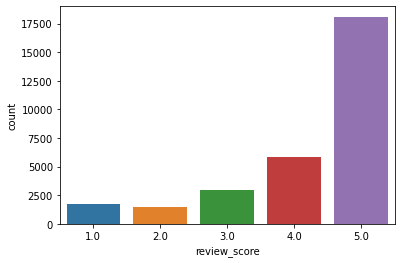

In [ ]:
sns.countplot(data=df, x='review_score')

###Data Pre-processing and Splitting

In [ ]:
  from sklearn.feature_extraction.text import TfidfVectorizer
  from nltk.stem.snowball import SnowballStemmer

In [ ]:
#Creating a stemmer
stemmer = SnowballStemmer("english")

In [ ]:
#Defining tokenizing function to pass into TfidfVectorizer
def tokens(x):
  x = x.split()
  stems = []
  [stems.append(stemmer.stem(word)) for word in x]
  return stems

In [ ]:
#Defining Vectorizer
vectorizer = TfidfVectorizer(tokenizer = tokens, stop_words = 'english', ngram_range = (1,1), min_df = 0.01)
#Fitting the vectorizers to the data and separating features from the dataset
features = vectorizer.fit_transform(df['text'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
features[0][0]

<1x785 sparse matrix of type '<class 'numpy.float64'>'
	with 40 stored elements in Compressed Sparse Row format>

In [ ]:
#Extracting the target column from the dataframe
target = df.review_score.values

In [ ]:
target

array([3., 5., 5., ..., 5., 5., 4.])

In [ ]:
target.astype(int)

array([3, 5, 5, ..., 5, 5, 4])

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
#Splitting the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

###ML Model 1: Random Forest Classifier for Review Classification

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Making the grid search object
gs2 = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        'n_estimators' : [200]
    },
    cv= StratifiedKFold(n_splits=5),
)

#Fitting the grid search object to the dataset
print('Fitting Grid Search...')
gs2.fit(X_train, y_train)
print('Grid search fitted.')

Fitting Grid Search...
Grid search fitted.


In [ ]:
#Making predictions for the test set
y_pred_test = gs2.predict(X_test)

In [ ]:
#Viewing Accuracy Score
accuracy_score(y_test, y_pred_test)

0.6239600665557404

In [ ]:
#Viewing confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[  69,    5,    7,   17,  247],
       [  21,    7,    7,   35,  229],
       [  12,    4,   22,   78,  426],
       [   7,    1,   12,  128, 1051],
       [  14,    1,    4,   82, 3524]])

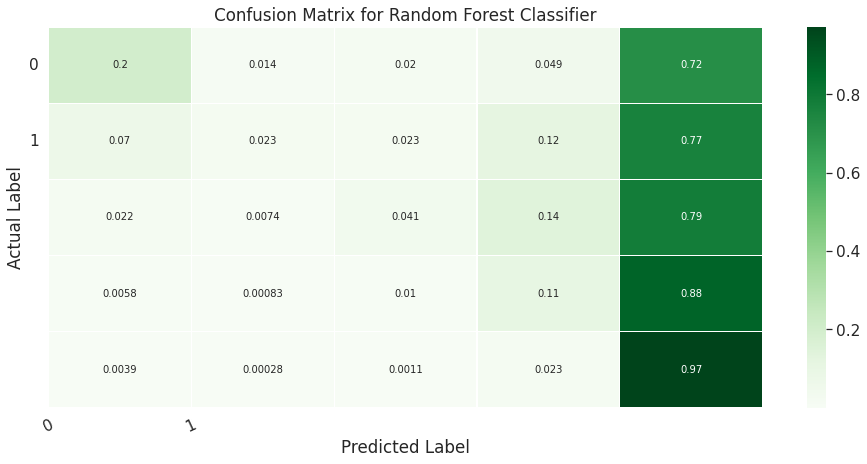

In [ ]:
#Getting and reshaping confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#Building the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

#Adding labels to plot
class_names = ['0', '1']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation = 25)
plt.yticks(tick_marks2, class_names, rotation = 0)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [ ]:
#Viewing the classification report for the test data and predictions
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         1.0       0.56      0.20      0.29       345
         2.0       0.39      0.02      0.04       299
         3.0       0.42      0.04      0.07       542
         4.0       0.38      0.11      0.17      1199
         5.0       0.64      0.97      0.77      3625

    accuracy                           0.62      6010
   macro avg       0.48      0.27      0.27      6010
weighted avg       0.55      0.62      0.53      6010



###ML Model 2: Logistic Regression for Review Classification

In [ ]:
from sklearn.linear_model import LogisticRegression
gs2 = GridSearchCV(
    estimator=LogisticRegression(solver='lbfgs', max_iter=1000),
    cv= StratifiedKFold(n_splits=5),
    param_grid={'class_weight': [None, 'balanced']},
)

#Fitting the grid search object to the dataset
print('Fitting Grid Search...')
gs2.fit(X_train, y_train)
print('Grid search fitted.')

Fitting Grid Search...
Grid search fitted.


In [ ]:
#Making predictions for the test set
y_pred_test = gs2.predict(X_test)

In [ ]:
#Viewing Accuracy Score
accuracy_score(y_test, y_pred_test)

0.6499168053244593

In [ ]:
#Viewing confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[ 125,   12,   25,   23,  160],
       [  35,   17,   58,   37,  152],
       [  20,   15,  100,  115,  292],
       [  13,    6,   70,  263,  847],
       [  19,    8,   32,  165, 3401]])

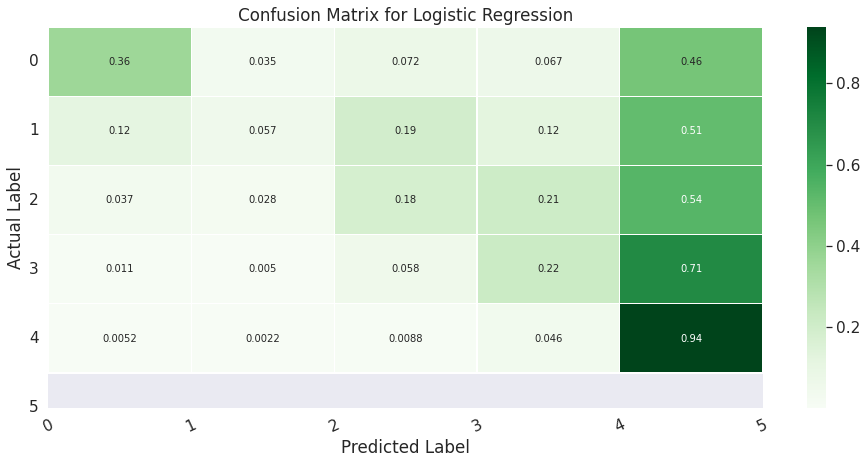

In [ ]:
#Getting and reshaping confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#Building the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

#Adding labels to plot
class_names = ['0', '1', '2', '3', '4', '5']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation = 25)
plt.yticks(tick_marks2, class_names, rotation = 0)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

###Changing the dataset for Category Classification

In [ ]:
df.head()

,review_id,text,verified,review_score,product_category
0,product_review_000000,I had received my copy of this new version of ...,True,3.0,video_games
1,product_review_000001,That ever since i purchased my DS when it was ...,False,5.0,video_games
2,product_review_000002,"Simple, and just a bit goes a long way..",True,5.0,musical_instruments
3,product_review_000003,I have not played any of the other games in th...,True,4.0,video_games
4,product_review_000004,i got it quick and it was in great shape works...,True,5.0,video_games


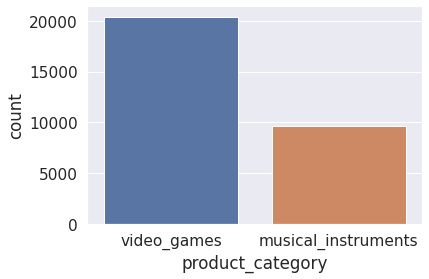

In [ ]:
sns.countplot(data = df, x='product_category')

In [ ]:
#Changing Categorical Data to Numerical Data
from sklearn.preprocessing import LabelEncoder

In [ ]:
label = LabelEncoder()

In [ ]:
#convert musical_instrument to 0
#convert video_games to 1
df['product_category'] = label.fit_transform(df.product_category.values)

In [ ]:
df.head()

,review_id,text,verified,review_score,product_category
0,product_review_000000,I had received my copy of this new version of ...,True,3.0,1
1,product_review_000001,That ever since i purchased my DS when it was ...,False,5.0,1
2,product_review_000002,"Simple, and just a bit goes a long way..",True,5.0,0
3,product_review_000003,I have not played any of the other games in th...,True,4.0,1
4,product_review_000004,i got it quick and it was in great shape works...,True,5.0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, df.product_category.values, test_size = 0.2, random_state = 42)

###ML Model 1: Random Forest Classifier for Category Classification

In [ ]:
#Making the grid search object
gs2 = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        'n_estimators' : [200]
    },
    cv= StratifiedKFold(n_splits=5),
)

#Fitting the grid search object to the dataset
print('Fitting Grid Search...')
gs2.fit(X_train, y_train)
print('Grid search fitted.')

Fitting Grid Search...
Grid search fitted.


In [ ]:
#Making predictions for the test set
y_pred_test = gs2.predict(X_test)

In [ ]:
#Viewing Accuracy Score
accuracy_score(y_test, y_pred_test)

0.9001663893510815

In [ ]:
#Viewing confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[1624,  273],
       [ 327, 3786]])

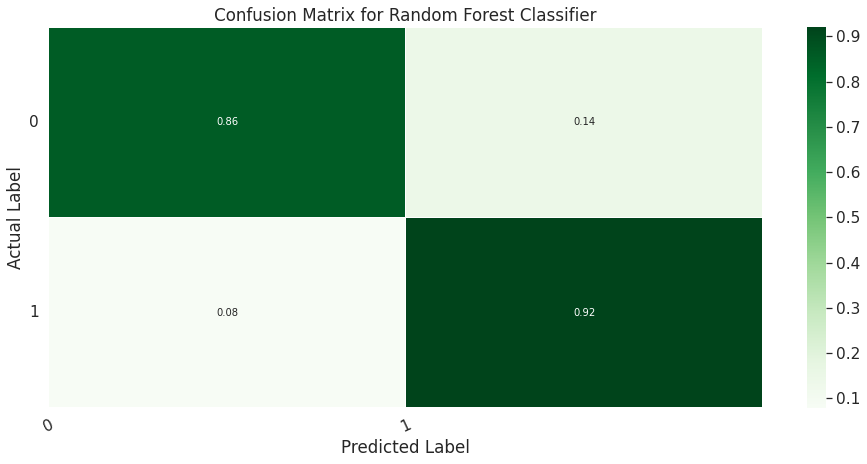

In [ ]:
#Getting and reshaping confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#Building the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

#Adding labels to plot
class_names = ['0', '1']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation = 25)
plt.yticks(tick_marks2, class_names, rotation = 0)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

###ML Model 2: Logistic Regression for Category Classification

In [ ]:
#Making the grid search object
gs2 = GridSearchCV(
    estimator=LogisticRegression(solver='lbfgs', max_iter=1000),
    cv= StratifiedKFold(n_splits=5),
    param_grid={'class_weight': [None, 'balanced']},
)

#Fitting the grid search object to the dataset
print('Fitting Grid Search...')
gs2.fit(X_train, y_train)
print('Grid search fitted.')

Fitting Grid Search...
Grid search fitted.


In [ ]:
#Making predictions for the test set
y_pred_test = gs2.predict(X_test)

In [ ]:
#Viewing Accuracy Score
accuracy_score(y_test, y_pred_test)

0.9089850249584026

In [ ]:
#Viewing confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[1612,  285],
       [ 262, 3851]])

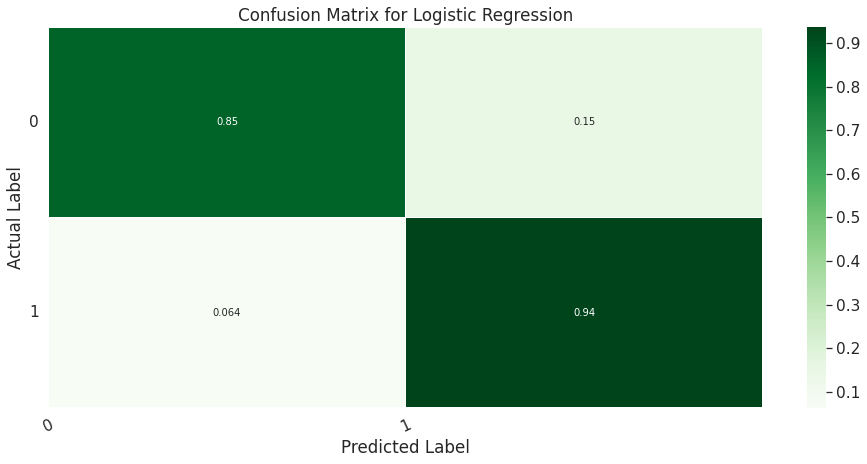

In [ ]:
#Getting and reshaping confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#Building the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

#Adding labels to plot
class_names = ['0', '1']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation = 25)
plt.yticks(tick_marks2, class_names, rotation = 0)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()